## Kütüphanelerin Yüklenmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Veriyi Okuma

In [2]:
kalp_veri= pd.read_csv("kalp.csv")
kalp_veri.loc[(kalp_veri["talasemi"]==0),"talasemi"] = 1

In [3]:
print("\nİlk 5 satır:")
kalp_veri.head()


İlk 5 satır:


,yaş,cinsiyet,göğüs ağrı tipi,kan basıncı,kolesterol,kan şekeri,ekg,max kalp hızı,angina,st depresyonu,st eğim,büyük damar,talasemi,sonuç
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("\nSon 5 satır:\n")
kalp_veri.tail()


Son 5 satır:



,yaş,cinsiyet,göğüs ağrı tipi,kan basıncı,kolesterol,kan şekeri,ekg,max kalp hızı,angina,st depresyonu,st eğim,büyük damar,talasemi,sonuç
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


#### Tekrar Eden Satır Kontrolü

In [5]:
kalp_veri=kalp_veri.drop_duplicates()

### Eksik Veri Kontrolü

In [6]:
kalp_veri.isnull().sum()

yaş                0
cinsiyet           0
göğüs ağrı tipi    0
kan basıncı        0
kolesterol         0
kan şekeri         0
ekg                0
max kalp hızı      0
angina             0
st depresyonu      0
st eğim            0
büyük damar        0
talasemi           0
sonuç              0
dtype: int64

#### Veriye Genel Bakış

In [7]:
kalp_veri.shape

(302, 14)

In [8]:
kalp_veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yaş              302 non-null    int64  
 1   cinsiyet         302 non-null    int64  
 2   göğüs ağrı tipi  302 non-null    int64  
 3   kan basıncı      302 non-null    int64  
 4   kolesterol       302 non-null    int64  
 5   kan şekeri       302 non-null    int64  
 6   ekg              302 non-null    int64  
 7   max kalp hızı    302 non-null    int64  
 8   angina           302 non-null    int64  
 9   st depresyonu    302 non-null    float64
 10  st eğim          302 non-null    int64  
 11  büyük damar      302 non-null    int64  
 12  talasemi         302 non-null    int64  
 13  sonuç            302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


#### Veri Hakkında İstatistiksel Bilgiler

In [9]:
kalp_veri.describe()

,yaş,cinsiyet,göğüs ağrı tipi,kan basıncı,kolesterol,kan şekeri,ekg,max kalp hızı,angina,st depresyonu,st eğim,büyük damar,talasemi,sonuç
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.321192,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.592994,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Görselleştirme

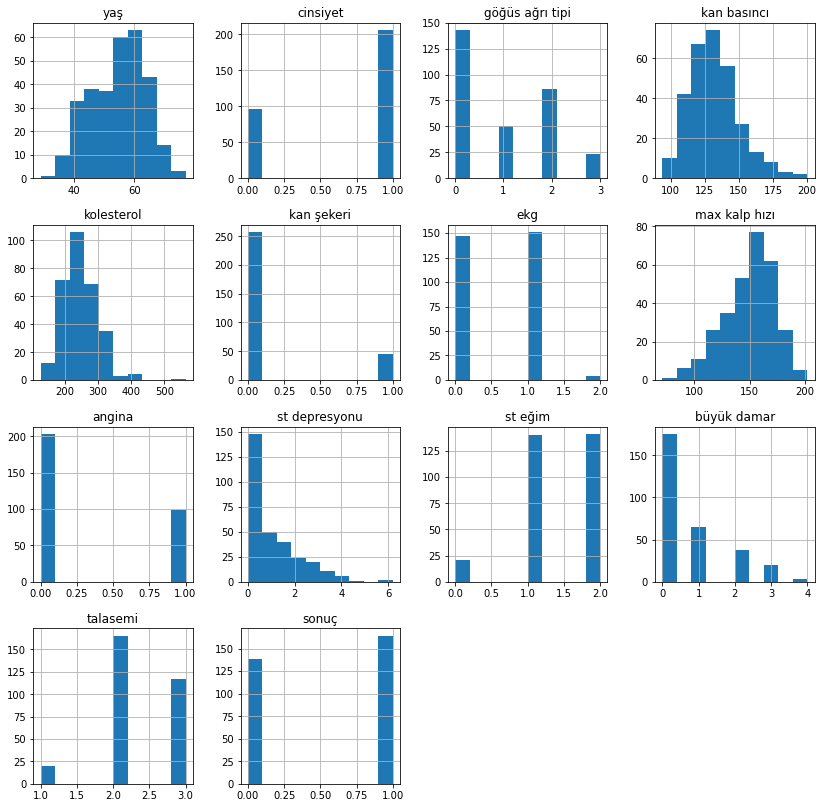

In [10]:
kalp_veri.hist(figsize= (14,14))
plt.show()

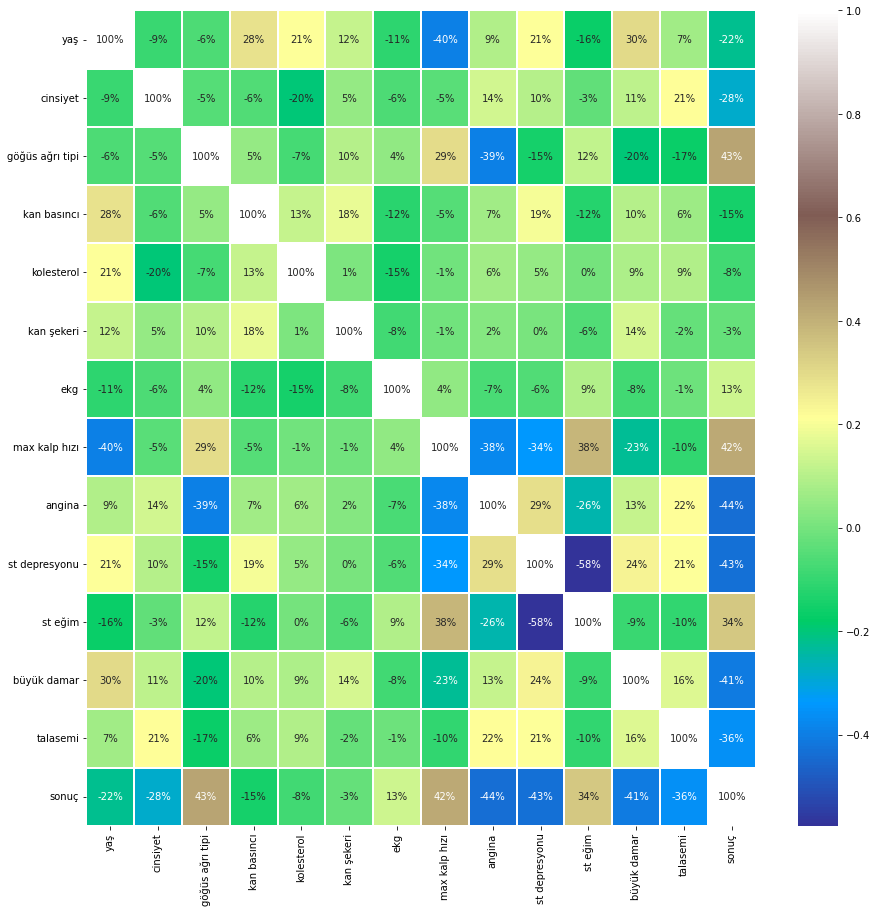

In [11]:
plt.figure(figsize= (15,15))
h= sns.heatmap(kalp_veri.corr(), annot= True, cmap="terrain", fmt= ".0%", linewidths= 0.3)
plt.show()

1    164
0    138
Name: sonuç, dtype: int64

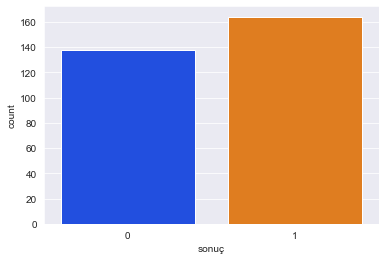

In [12]:
sns.set_style("darkgrid") 
sns.countplot(x= "sonuç", data= kalp_veri, palette= "bright") 
kalp_veri["sonuç"].value_counts()

1    206
0     96
Name: cinsiyet, dtype: int64

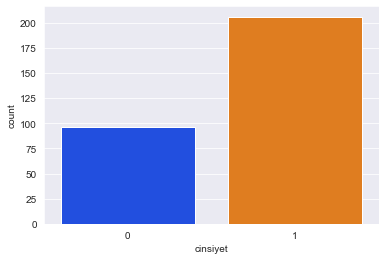

In [13]:
sns.countplot(x= "cinsiyet", data= kalp_veri, palette= "bright")
kalp_veri["cinsiyet"].value_counts()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


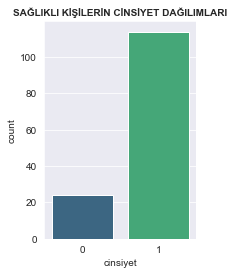

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


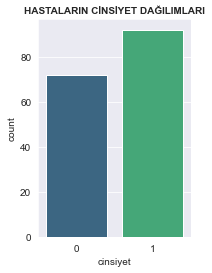

In [14]:
pic1= kalp_veri[kalp_veri["sonuç"]==1]
pic0= kalp_veri[kalp_veri["sonuç"]==0]
r= plt.subplot2grid((1,2),(0,0))
sns.countplot(pic0["cinsiyet"], palette= "viridis")
plt.title("SAĞLIKLI KİŞİLERİN CİNSİYET DAĞILIMLARI", fontsize= 10, weight= "bold")
plt.show()
r= plt.subplot2grid((1,2),(0,1))
sns.countplot(pic1["cinsiyet"], palette= "viridis")
plt.title("HASTALARIN CİNSİYET DAĞILIMLARI", fontsize= 10, weight= "bold")
plt.show()

### Veriyi Bölme

In [15]:
x = kalp_veri.iloc[:,0:13]
print("\nBağımlı Değişkenler\n")
print(x)
y = kalp_veri.iloc[:,13]
print("\nBağımsız Değişken\n")
print(y)


Bağımlı Değişkenler

     yaş  cinsiyet  göğüs ağrı tipi  kan basıncı  kolesterol  kan şekeri  ekg  \
0     63         1                3          145         233           1    0   
1     37         1                2          130         250           0    1   
2     41         0                1          130         204           0    0   
3     56         1                1          120         236           0    1   
4     57         0                0          120         354           0    1   
..   ...       ...              ...          ...         ...         ...  ...   
298   57         0                0          140         241           0    1   
299   45         1                3          110         264           0    1   
300   68         1                0          144         193           1    1   
301   57         1                0          130         131           0    1   
302   57         0                1          130         236           0    0   

     

#### Veriyi Eğitim ve Test Kümesine Ayırma

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33, stratify=y, random_state=0)
print(x_train.shape, x_test.shape)

(202, 13) (100, 13)


##### 1-) Rassal Orman

In [17]:
RF= RandomForestClassifier(criterion= "gini")
RF.fit(x_train, y_train)

RandomForestClassifier()

###### Model Başarısı

In [18]:
tahmin_rf= RF.predict(x_test)
basari_orani_rf=accuracy_score(tahmin_rf, y_test)
print("\nRassal Orman Tahmin Doğruluğu:", basari_orani_rf)


Rassal Orman Tahmin Doğruluğu: 0.8


###### Karmaşıklık Matrisi

In [19]:
cm_rf= confusion_matrix(y_test, tahmin_rf)
print("\nRassal Orman Karmaşıklık Matrisi:\n")
print(cm_rf)


Rassal Orman Karmaşıklık Matrisi:

[[38  8]
 [12 42]]


###### Bağımsız Değişkenlerin Önemi

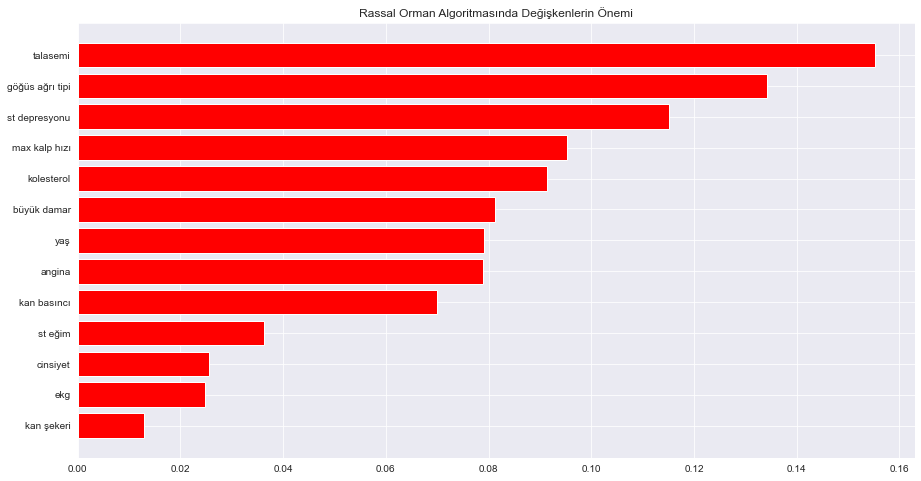

In [20]:
degiskenler = x_train.columns
onem = RF.feature_importances_
sıralama = np.argsort(onem)

plt.figure(figsize=(15, 8))
plt.figure(1)
plt.title("Rassal Orman Algoritmasında Değişkenlerin Önemi")
plt.barh(range(len(sıralama)), onem[sıralama], color='r', align='center')
plt.yticks(range(len(sıralama)), degiskenler[sıralama])
plt.show()

##### 2-) Destek Vektör Makineleri

In [21]:
SVM=SVC(kernel= "linear")
SVM.fit(x_train, y_train)

SVC(kernel='linear')

##### Model Başarısı

In [22]:
tahmin_svm= SVM.predict(x_test)
basari_orani_svm= accuracy_score(tahmin_svm, y_test)
print("\nDestek Vektör Makineleri Tahmin Doğruluğu:", basari_orani_svm)


Destek Vektör Makineleri Tahmin Doğruluğu: 0.87


##### Karmaşıklık Matrisi

In [23]:
cm_svm= confusion_matrix(y_test, tahmin_svm)
print("\nDestek Vektör Makineleri Karmaşıklık Matrisi:\n")
print(cm_svm)


Destek Vektör Makineleri Karmaşıklık Matrisi:

[[37  9]
 [ 4 50]]


##### 3-) Karar Ağacı

In [24]:
DT= DecisionTreeClassifier(criterion= "gini", splitter='best')
DT.fit(x_train, y_train)

DecisionTreeClassifier()

##### Model Başarısı

In [25]:
tahmin_dt= DT.predict(x_test)
basari_orani_dt=accuracy_score(tahmin_dt, y_test)
print("\nKarar Ağacı Tahmin Doğruluğu:", basari_orani_dt)


Karar Ağacı Tahmin Doğruluğu: 0.76


##### Karmaşıklık Matrisi

In [26]:
cm_dt= confusion_matrix(y_test, tahmin_dt)
print("\nKarar Ağacı Karmaşıklık Matrisi:\n")
print(cm_dt)


Karar Ağacı Karmaşıklık Matrisi:

[[36 10]
 [14 40]]


##### Bağımsız Değişkenlerin Önemi

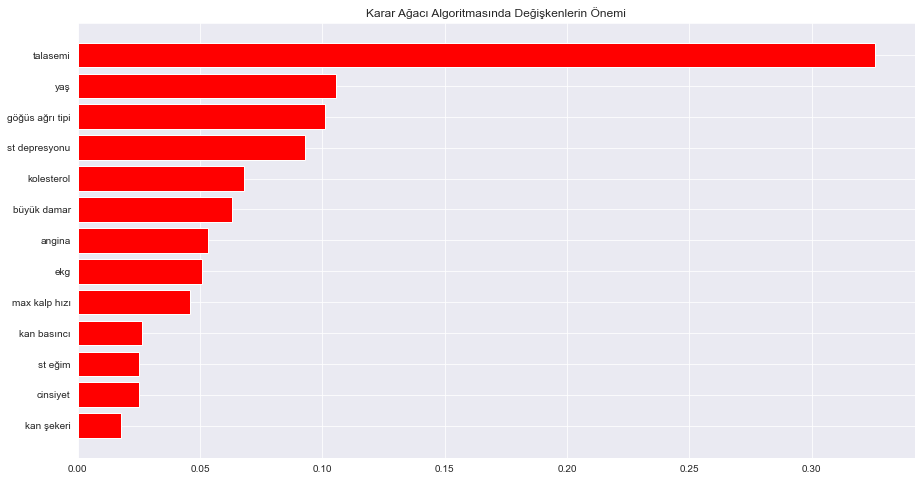

In [27]:
degiskenler = x_train.columns
onem = DT.feature_importances_
sıralama = np.argsort(onem)

plt.figure(figsize=(15, 8))
plt.figure(1)
plt.title("Karar Ağacı Algoritmasında Değişkenlerin Önemi")
plt.barh(range(len(sıralama)), onem[sıralama], color='r', align='center')
plt.yticks(range(len(sıralama)), degiskenler[sıralama])
plt.show()

###### Karar Ağacı Görseli

[Text(2643.902027027027, 5134.0, 'talasemi <= 2.5\ngini = 0.496\nsamples = 202\nvalue = [92, 110]\nclass =  '),
 Text(1724.8986486486488, 4530.0, 'göğüs ağrı tipi <= 0.5\ngini = 0.352\nsamples = 123\nvalue = [28, 95]\nclass =  '),
 Text(1074.527027027027, 3926.0, 'angina <= 0.5\ngini = 0.5\nsamples = 43\nvalue = [21, 22]\nclass =  '),
 Text(565.5405405405405, 3322.0, 'büyük damar <= 0.5\ngini = 0.417\nsamples = 27\nvalue = [8, 19]\nclass =  '),
 Text(226.21621621621622, 2718.0, 'max kalp hızı <= 96.5\ngini = 0.198\nsamples = 18\nvalue = [2, 16]\nclass =  '),
 Text(113.10810810810811, 2114.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(339.3243243243243, 2114.0, 'kolesterol <= 316.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]\nclass =  '),
 Text(226.21621621621622, 1510.0, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass =  '),
 Text(452.43243243243245, 1510.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(904.8648648648649, 2718.0, 'cinsiyet <= 0.5\ngi

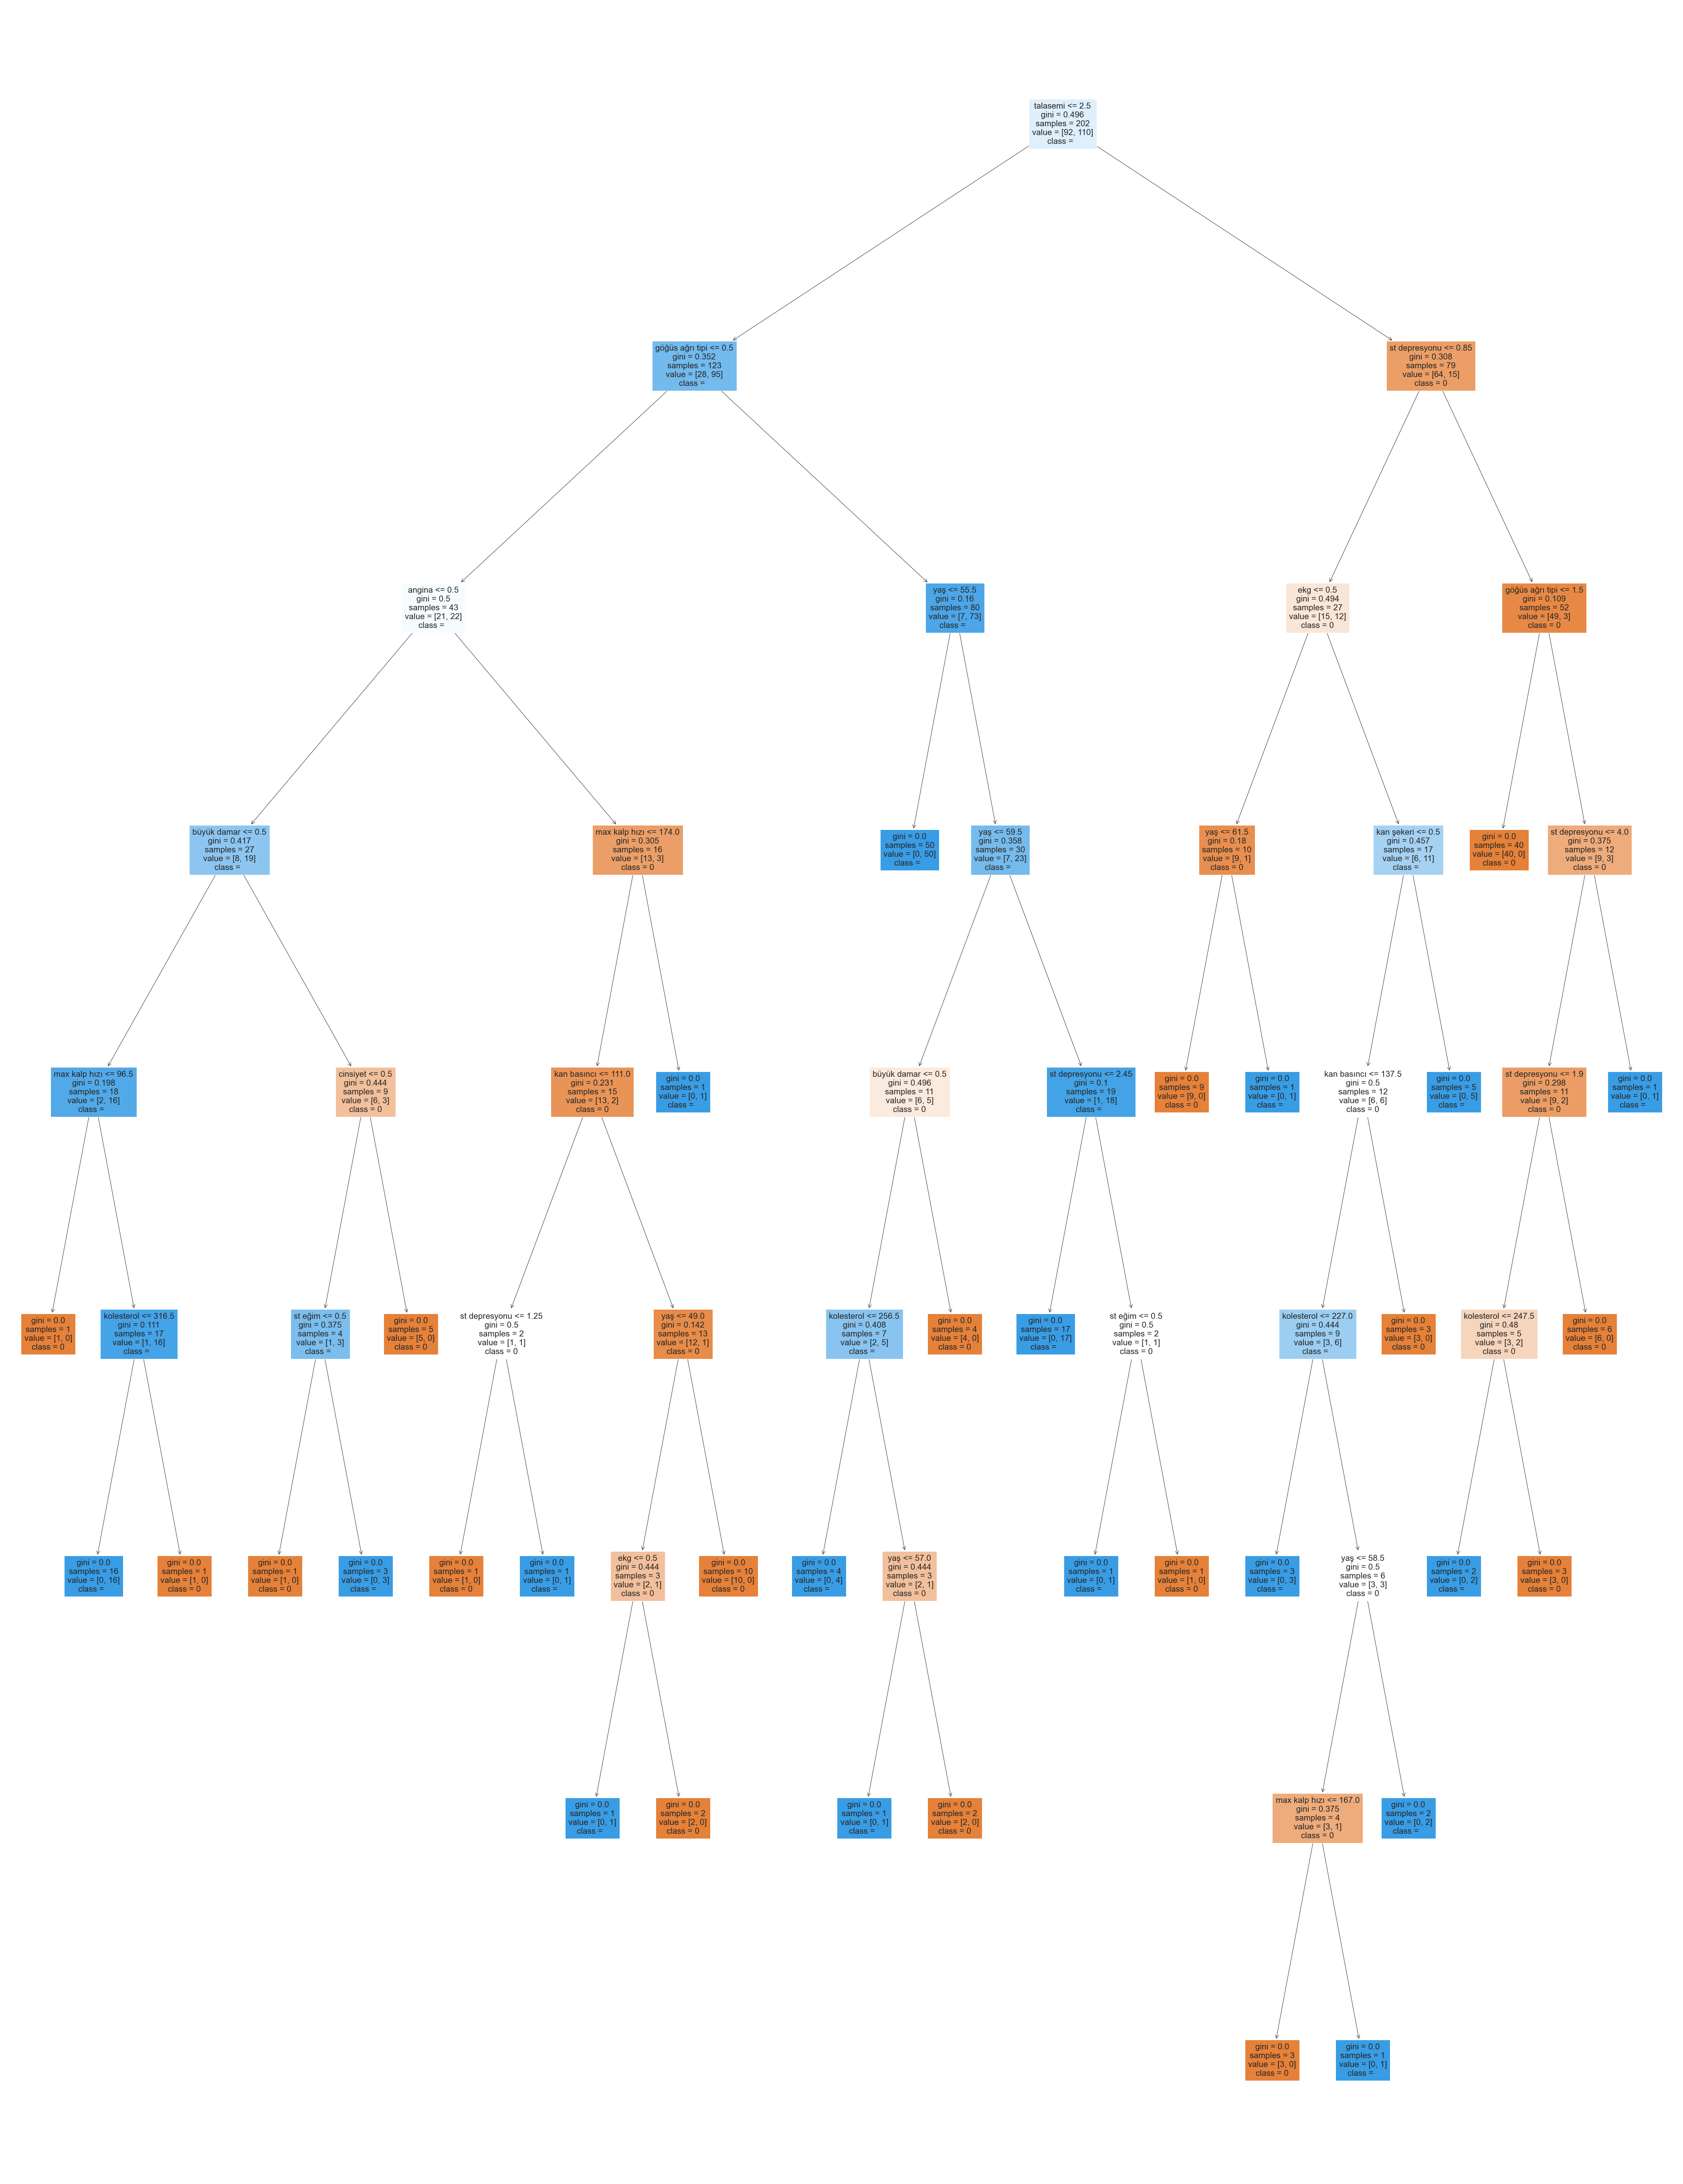

In [28]:
from sklearn import tree
plt.figure(figsize=(75,100))
tree.plot_tree(DT, 
                feature_names=x_train.columns,  
                class_names=str(kalp_veri.sonuç),
                filled=True)

##### 4-) Naive Bayes

In [29]:
NB=GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

##### Model Başarısı

In [30]:
tahmin_nb= NB.predict(x_test)
basari_orani_nb=accuracy_score(tahmin_nb, y_test)
print("\nNaive Bayes Tahmin Doğruluğu:", basari_orani_nb)


Naive Bayes Tahmin Doğruluğu: 0.83


##### Karmaşıklık Matrisi

In [31]:
cm_nb= confusion_matrix(y_test, tahmin_nb)
print("\nNaive Bayes Karmaşıklık Matrisi:\n")
print(cm_nb)


Naive Bayes Karmaşıklık Matrisi:

[[36 10]
 [ 7 47]]


##### 5-) K-En Yakın Komşuluk

In [32]:
KNN= KNeighborsClassifier(n_neighbors= 3, metric= "minkowski")
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

##### Model Başarısı

In [33]:
tahmin_knn= KNN.predict(x_test)
basari_orani_knn= accuracy_score(tahmin_knn, y_test)
print("\nK-Nearest Neighbor Tahmin Doğruluğu:", basari_orani_knn)


K-Nearest Neighbor Tahmin Doğruluğu: 0.63


##### Karmaşıklık Matrisi

In [34]:
cm_knn= confusion_matrix(y_test, tahmin_knn)
print("\nK-En Yakın Komşular Karmaşıklık Matrisi:\n")
print(cm_knn)


K-En Yakın Komşular Karmaşıklık Matrisi:

[[22 24]
 [13 41]]


##### 6-) Lojistik Regresyon

###### Varsayımların Kontrolü

In [35]:
kontrol=kalp_veri.iloc[:,0:13]
def vif_hesap(df):
    vif = pd.DataFrame()
    vif["variables"]= kontrol.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
vif_hesap(kontrol)

,variables,VIF
0,yaş,39.636959
1,cinsiyet,3.513397
2,göğüs ağrı tipi,2.410809
3,kan basıncı,58.847121
4,kolesterol,26.274246
5,kan şekeri,1.271555
6,ekg,2.051804
7,max kalp hızı,42.676619
8,angina,2.028752
9,st depresyonu,3.072829


In [36]:
kalp_veri_log= kalp_veri.drop(["kan basıncı"], axis= 1)

In [37]:
kontrol = kalp_veri_log.iloc[:,0:12]
def vif_hesap(df):
    vif = pd.DataFrame()
    vif["variables"]= kontrol.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
vif_hesap(kontrol)

,variables,VIF
0,yaş,28.963060
1,cinsiyet,3.512879
2,göğüs ağrı tipi,2.401816
3,kolesterol,25.914361
4,kan şekeri,1.252308
5,ekg,2.051758
6,max kalp hızı,34.258762
7,angina,1.998829
8,st depresyonu,2.980376
9,st eğim,10.013165


In [38]:
kalp_veri_log= kalp_veri_log.drop(["max kalp hızı"], axis= 1)
kontrol = kalp_veri_log.iloc[:,0:11]
def vif_hesap(df):
    vif = pd.DataFrame()
    vif["variables"]= kontrol.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
vif_hesap(kontrol)

,variables,VIF
0,yaş,27.540736
1,cinsiyet,3.409761
2,göğüs ağrı tipi,2.271919
3,kolesterol,22.364719
4,kan şekeri,1.250147
5,ekg,2.019277
6,angina,1.961180
7,st depresyonu,2.972181
8,st eğim,8.362154
9,büyük damar,1.797732


In [39]:
kalp_veri_log= kalp_veri_log.drop(["yaş"], axis= 1)
kontrol = kalp_veri_log.iloc[:,0:10]
def vif_hesap(df):
    vif = pd.DataFrame()
    vif["variables"]= kontrol.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
vif_hesap(kontrol)

,variables,VIF
0,cinsiyet,3.402471
1,göğüs ağrı tipi,2.214230
2,kolesterol,15.138084
3,kan şekeri,1.236158
4,ekg,2.002513
5,angina,1.953831
6,st depresyonu,2.842861
7,st eğim,7.982908
8,büyük damar,1.737742
9,talasemi,15.622663


In [40]:
kalp_veri_log= kalp_veri_log.drop(["kolesterol"], axis= 1)
kontrol = kalp_veri_log.iloc[:,0:9]
def vif_hesap(df):
    vif = pd.DataFrame()
    vif["variables"]= kontrol.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
vif_hesap(kontrol)

,variables,VIF
0,cinsiyet,3.343054
1,göğüs ağrı tipi,2.155734
2,kan şekeri,1.229634
3,ekg,2.001702
4,angina,1.925836
5,st depresyonu,2.660933
6,st eğim,6.291865
7,büyük damar,1.732057
8,talasemi,10.915333


In [41]:
kalp_veri_log= kalp_veri_log.drop(["talasemi"], axis= 1)
kontrol = kalp_veri_log.iloc[:,0:8]
def vif_hesap(df):
    vif = pd.DataFrame()
    vif["variables"]= kontrol.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
vif_hesap(kontrol)

,variables,VIF
0,cinsiyet,3.024979
1,göğüs ağrı tipi,2.108708
2,kan şekeri,1.228073
3,ekg,1.950564
4,angina,1.796380
5,st depresyonu,2.088208
6,st eğim,3.745249
7,büyük damar,1.707664


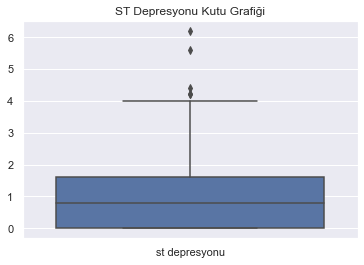

In [42]:
sns.set_theme(style= "darkgrid")
st_dep_box= sns.boxplot(data= kalp_veri_log[["st depresyonu"]]).set_title("ST Depresyonu Kutu Grafiği")
plt.show()

In [43]:
kalp_veri_log.loc[(kalp_veri_log["st depresyonu"]>4),"st depresyonu"] = 1.04

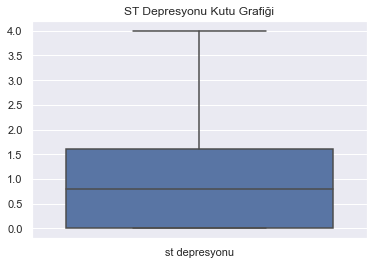

In [44]:
sns.set_theme(style= "darkgrid")
st_dep_box= sns.boxplot(data= kalp_veri_log[["st depresyonu"]]).set_title("ST Depresyonu Kutu Grafiği")
plt.show()

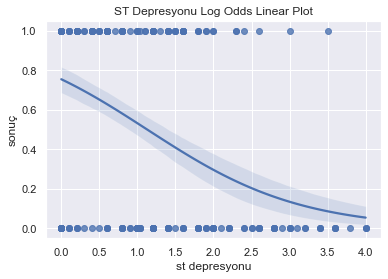

In [45]:
sns.set_theme(style= "darkgrid")
st_depresyon= sns.regplot(x= "st depresyonu", y= "sonuç", data= kalp_veri_log, logistic= True).set_title("ST Depresyonu Log Odds Linear Plot")
plt.show()

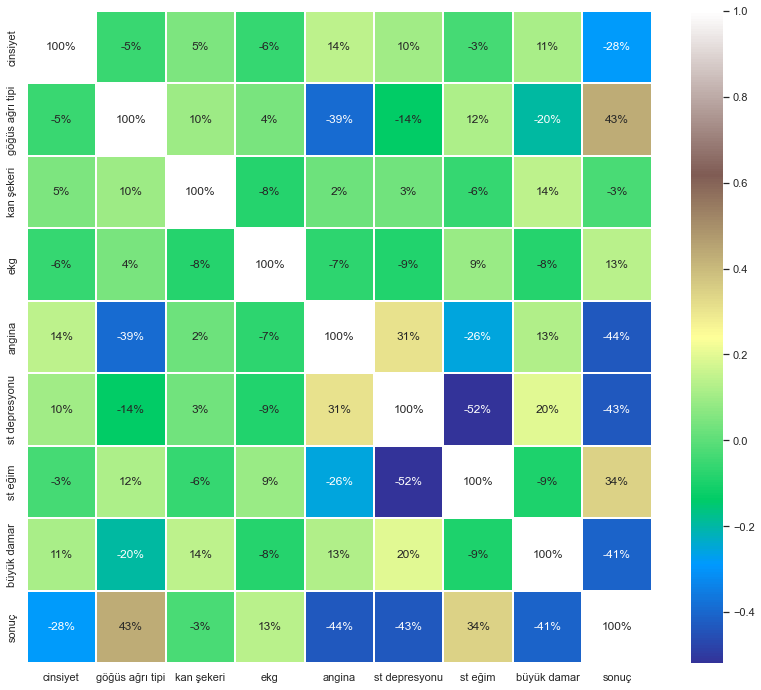

In [46]:
plt.figure(figsize= (14,12))
h= sns.heatmap(kalp_veri_log.corr(), annot= True, cmap="terrain", fmt= ".0%", linewidths= 0.3)
plt.show()

In [47]:
x= kalp_veri_log.iloc[:,0:8]
print("\nBağımlı Değişkenler\n")
print(x)
y= kalp_veri_log.iloc[:,8]
print("\nBağımsız Değişken\n")
print(y)


Bağımlı Değişkenler

     cinsiyet  göğüs ağrı tipi  kan şekeri  ekg  angina  st depresyonu  \
0           1                3           1    0       0            2.3   
1           1                2           0    1       0            3.5   
2           0                1           0    0       0            1.4   
3           1                1           0    1       0            0.8   
4           0                0           0    1       1            0.6   
..        ...              ...         ...  ...     ...            ...   
298         0                0           0    1       1            0.2   
299         1                3           0    1       0            1.2   
300         1                0           1    1       0            3.4   
301         1                0           0    1       1            1.2   
302         0                1           0    0       0            0.0   

     st eğim  büyük damar  
0          0            0  
1          0            0  
2    

In [48]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33, stratify=y, random_state=0)
print(x_train.shape, x_test.shape)

(202, 8) (100, 8)


In [49]:
LR= LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

##### Model Başarısı

In [50]:
tahmin_lr= LR.predict(x_test)
basari_orani_lr= accuracy_score(tahmin_lr, y_test)
print("\nLojistik Regresyon Tahmin Doğruluğu:", basari_orani_lr)


Lojistik Regresyon Tahmin Doğruluğu: 0.87


##### Karmaşıklık Matrisi

In [51]:
cm_lr= confusion_matrix(y_test,tahmin_lr)
print("\nLojistik Regresyon Confusion Matrix:\n")
print(cm_lr)


Lojistik Regresyon Confusion Matrix:

[[38  8]
 [ 5 49]]


In [52]:
log_reg= sm.Logit(y_train, x_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.388647
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  sonuç   No. Observations:                  202
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            7
Date:                Sat, 04 Jun 2022   Pseudo R-squ.:                  0.4361
Time:                        14:52:00   Log-Likelihood:                -78.507
converged:                       True   LL-Null:                       -139.21
Covariance Type:            nonrobust   LLR p-value:                 3.892e-23
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
cinsiyet           -1.3800      0.458     -3.013      0.003      -2.278      -0.482
göğüs ağrı tip

In [53]:
#kan şekeri parametresi istatistiksel olarak anlamlı olmadığı için veri setimizden çıkarılmıştır.
kalp_veri_final= kalp_veri_log.drop(["kan şekeri"], axis= 1)

In [54]:
x= kalp_veri_final.iloc[:,0:7]
print("\nBağımlı Değişkenler\n")
print(x)
y= kalp_veri_final.iloc[:,7]
print("\nBağımsız Değişken\n")
print(y)


Bağımlı Değişkenler

     cinsiyet  göğüs ağrı tipi  ekg  angina  st depresyonu  st eğim  \
0           1                3    0       0            2.3        0   
1           1                2    1       0            3.5        0   
2           0                1    0       0            1.4        2   
3           1                1    1       0            0.8        2   
4           0                0    1       1            0.6        2   
..        ...              ...  ...     ...            ...      ...   
298         0                0    1       1            0.2        1   
299         1                3    1       0            1.2        1   
300         1                0    1       0            3.4        1   
301         1                0    1       1            1.2        1   
302         0                1    0       0            0.0        1   

     büyük damar  
0              0  
1              0  
2              0  
3              0  
4              0  
..         

In [55]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33, stratify=y, random_state=0)
print(x_train.shape, x_test.shape, y_test.shape)

(202, 7) (100, 7) (100,)


In [56]:
LR= LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [57]:
tahmin_lr= LR.predict(x_test)
basari_orani_lr= accuracy_score(tahmin_lr, y_test)
print("\nLojistik Regresyon Tahmin Doğruluğu:", basari_orani_lr)


Lojistik Regresyon Tahmin Doğruluğu: 0.89


In [58]:
cm_lr= confusion_matrix(y_test,tahmin_lr)
print("\nLojistik Regresyon Confusion Matrix:\n")
print(cm_lr)


Lojistik Regresyon Confusion Matrix:

[[38  8]
 [ 3 51]]


In [59]:
log_reg= sm.Logit(y_train, x_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.394467
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  sonuç   No. Observations:                  202
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            6
Date:                Sat, 04 Jun 2022   Pseudo R-squ.:                  0.4276
Time:                        14:52:00   Log-Likelihood:                -79.682
converged:                       True   LL-Null:                       -139.21
Covariance Type:            nonrobust   LLR p-value:                 2.566e-23
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
cinsiyet           -1.2993      0.450     -2.884      0.004      -2.182      -0.416
göğüs ağrı tip

#### Lojistik Regresyon Tahmin Sistemi

In [72]:
#inputveri=(60,1,2,140,185,0,0,155,0,3,1,0,2,0)
print("Sırası ile cinsiyet, göğüs ağrı tipi, ekg, angina, st depresyonu, st eğim ve büyük damar değerlerini giriniz:\n")
x=float(input())
y=float(input())
z=float(input())
a=float(input())
b=float(input())
c=float(input())
d=float(input())
#inputveri= (1,2,1,1,1.4,1,1)
inputveri= (x,y,z,a,b,c,d)
inputveri= np.asarray(inputveri)
#inputveriyi numpy array'e dönüştürme
inputveri= inputveri.reshape(1,-1)
tahmin= LR.predict(inputveri)
print(tahmin)
if (tahmin[0]==0):
    print("\nKişinin kalp hastalığı yoktur ve hasta olma ihtimali aşağıdaki gibidir\n")
else:
    print("\nKişinin kalp hastalığı vardır ve hasta olma ihtimali aşağıdaki gibidir\n")
ihtimal=1/(1+2.71828183**-(-1.2993*x+0.9368*y+1.006*z-1.3249*a-0.5732*b+0.8069*c-0.7344*d))
print("%",ihtimal*100)


Sırası ile cinsiyet, göğüs ağrı tipi, ekg, angina, st depresyonu, st eğim ve büyük damar değerlerini giriniz:

1
3
3
0
1.2
2
4
[1]

Kişinin kalp hastalığı vardır ve hasta olma ihtimali aşağıdaki gibidir

% 92.53568025303743


# Karşılaştırma

Text(0.5, 1.0, 'Algoritmaların Karşılaştırılması')

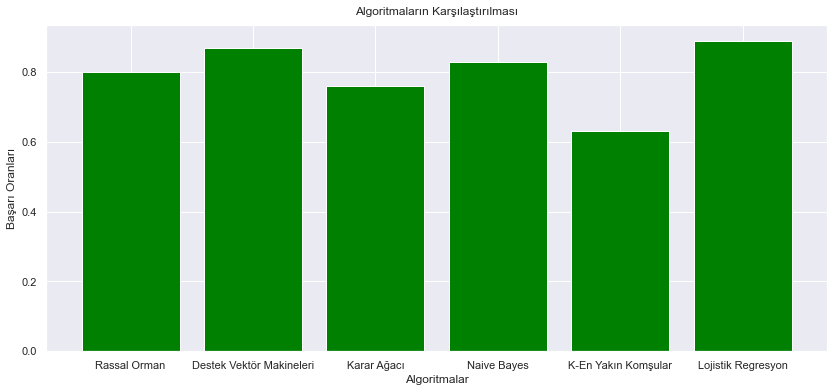

In [61]:
basari_oranlari = [basari_orani_rf, basari_orani_svm, basari_orani_dt, basari_orani_nb, basari_orani_knn, basari_orani_lr]
degiskenler = ["Rassal Orman", "Destek Vektör Makineleri", "Karar Ağacı", "Naive Bayes", "K-En Yakın Komşular", "Lojistik Regresyon"]
plt.figure(figsize=(14,6))
index = np.arange(len(degiskenler))
plt.bar(index, basari_oranlari, color='green')
plt.xlabel("Algoritmalar")
plt.ylabel("Başarı Oranları")
plt.xticks(index, degiskenler)
 

plt.title(label="Algoritmaların Karşılaştırılması", 
          fontweight=12, 
          pad='10.0')